# Boston housing data & Nearest-Neighbors

---

## Introduction

For this analysis, I build a nearest neighbors algorithm from scratch to predict housing values using the Boston Housing Prices Data Set. The report includes: 
- Exploratory data analysis 
- Cleaning & Wrangling 
- Splitting train and test data
- Creating a basic model based on averages and using RMSE for evaluation
- Writing a distance function
- Writing a nearest-neighbors function
- Optimizing the function

This data used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). 

In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [4]:
print(bdata.keys)
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

<built-in method keys of Bunch object at 0x1159a86d0>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD   

---

## Part 1: Descriptive analysis

### 1.1: Histogram of housing prices

Below you will find some code to make a basic histogram of median housing prices (the "target" variable) for my dataset.  

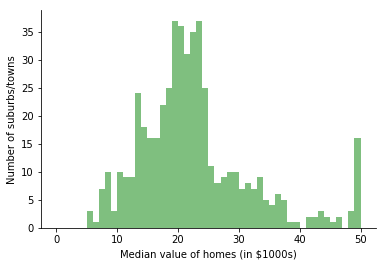

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt 

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
plt.hist(bdata.target,bins=range(0,51,1),color="green",alpha=0.5)
plt.xlabel('Median value of homes (in $1000s)')
plt.ylabel('Number of suburbs/towns')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

### 1.2: Scatter plot of housing prices and crime

Now I use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).

In [6]:
#bdata({'feature_names':'CRIM')
df = pd.DataFrame(bdata.data)

In [7]:
feat_list = bdata.feature_names.tolist()
print(df.head(5))

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
df.columns=feat_list
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


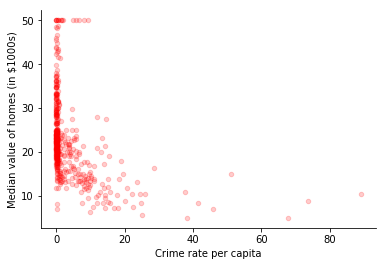

In [9]:
fig2 = plt.figure(facecolor='white')
ax2 = plt.axes(frameon=True)
plt.scatter(df['CRIM'],bdata.target,color="red",s=20,alpha=0.2)
plt.xlabel('Crime rate per capita')
plt.ylabel('Median value of homes (in $1000s)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

### 1.3: Histogram of housing prices, faceted by being near the Charles River

# of towns not bordering Charles River is  471
# of towns bordering Charles River is  35


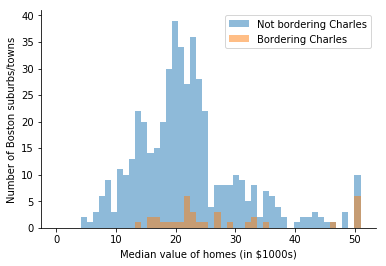

In [10]:
print('# of towns not bordering Charles River is ',sum(df['CHAS']==0))
print('# of towns bordering Charles River is ',sum(df['CHAS']==1))

hvals_nocharles = bdata.target[df['CHAS']==0]
hvals_charles = bdata.target[df['CHAS']==1]

ax3 = plt.axes(frameon=True)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

bins = np.linspace(0, 51, 51)
plt.hist(hvals_nocharles, bins, alpha=0.5, label='Not bordering Charles')
plt.hist(hvals_charles, bins, alpha=0.5, label='Bordering Charles')
plt.xlabel('Median value of homes (in $1000s)')
plt.ylabel('Number of Boston suburbs/towns')
plt.legend(loc='upper right')
plt.show()

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1: Root Mean Squared Error for a list of numbers

In [11]:
predictions = [2,2,3]
yvalues = [0,2,6]

def compute_rmse(preds, yvals):
    numerator = 0
    for x in range(0,len(preds)):
        sqrd = (preds[x]-yvals[x])**2
        numerator += sqrd
    rmse = (numerator/len(preds))**0.5
    return rmse
    
compute_rmse(predictions,yvalues)

2.0816659994661326

### 2.2: Divide data into training and testing datasets

66% of the data is randomly selected for training, and the remaining 34% is used for testing.

In [12]:
import random
np.random.seed(seed=13579)

In [13]:
# create one data frame
df['MEDV']=bdata.target

df['rand'] = df.apply(lambda row: random.random(), axis=1)
df['train'] = df['rand']>.33

df_train = df[df['train']==True]
df_test = df[df['train']==False]

print(len(df_train))
print(len(df_test))

336
170


In [14]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

### 2.3 Use a very bad baseline for prediction, and compute RMSE

First I build a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set. I compute the RMSE on the training set ad the test data set  (using the model I trained on the training set!). I expect RMSE for testing dataset to be  greater than the training data set because this poor model carried over the average of the training data without taking the new property values in the test dataset into the calculation of the mean, much less the impact of other features.

In [15]:
def bad_medv_predictor(home_values):
    avg_home_value = np.mean(home_values)
    predicted_home_values = [avg_home_value] * len(home_values)
    return predicted_home_values

In [16]:
predicted_bvalues = bad_medv_predictor(df_train['MEDV'])
rmse_train = compute_rmse(predicted_bvalues, df_train['MEDV'].tolist())
print('RMSE on training data is: ', rmse_train)

RMSE on training data is:  9.363544545988491


In [17]:
len(df_test['MEDV'])

170

In [18]:
avg_home_value2 = predicted_bvalues[0]
predicted_bvalues_shortened = [avg_home_value2] * len(df_test['MEDV'])
rmse_test = compute_rmse(predicted_bvalues_shortened, df_test['MEDV'].tolist())
print('RMSE on test data is: ', rmse_test)

RMSE on test data is:  8.832744730471072


*The RMSE for the test data set is lower than the RMSE for the training data which is not what I expected, but we can still do better!*

---

## Part 3: Nearest Neighbors


### 3.1: Nearest Neighbors: Distance function
Now I build a machine learning algorithm to beat the "Average Value" baseline computed above. First I need to create a distance metric to measure the distance (and similarity) between two instances. Below is a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia).

In [19]:
def distance(x1,x2,L):
    #your code here
    x1 = np.array(x1)
    x2 = np.array(x2)
    #dist = (sum((x2-x1) ** L)** (1/L))
    dist = (sum([(b-a) ** L for a, b in zip (x1,x2)])** (1/L)) 
    return dist

In [20]:
distance((3,4),(6,8),2)

5.0

### 3.2: Basic Nearest Neighbor algorithm

Now things get fun. Below I implement a basic nearest neighbor algorithm from scratch. My simple model uses two input features (CRIM and RM) and a single output (MEDV). In other words, I am modelling the relationship between median home value and crime rates and house size.

I use my training data to "fit" your model. Note that with Nearest Neighbors there is no real "training"; I'm only keeping my training data in memory. The following function predicts, for each instance in the testing data, the median home value using the nearest neighbor algorithm.  Since this is a small dataset, I simply compare my test instance to every instance in the training set, and return the MEDV value of the closest training instance. My function takes L as an input, where L is passed to the distance function.

In [21]:
import time
def nneighbor(training_df, test_df, L):
    start_time = time.time()
    
    test_df['PRED_MEDV'] = ""
    test_narrow = test_df[['CRIM','RM']]
    train_narrow = training_df[['CRIM','RM']]
    
    # looping through data for which we want to predict MEDV (i.e. test data)
    for index1, row1 in test_narrow.iterrows():
        all_dist = []
        #print(np.asarray(row1))
        
        # looping through training data to find nearest neighbor
        for index2, row2 in train_narrow.iterrows(): 
            #print(np.asarray(row2))
            dist_val = distance(row2, row1, L)
            all_dist.append(dist_val)
        
        target_ind = all_dist.index(min(all_dist))
        predicted_medv = training_df['MEDV'].values[target_ind]
        test_df.loc[index1,'PRED_MEDV'] = predicted_medv  
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return test_df

In [22]:
test_df2 = nneighbor(df_train, df_test, 2)
print(test_df2.head(4))

Time taken: 4.07 seconds
   index     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0      4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
1      6  0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   
2      7  0.14455  12.5   7.87   0.0  0.524  6.172  96.1  5.9505  5.0  311.0   
3      9  0.17004  12.5   7.87   0.0  0.524  6.004  85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV      rand  train PRED_MEDV  
0     18.7  396.90   5.33  36.2  0.065624  False      37.3  
1     15.2  395.60  12.43  22.9  0.267174  False      21.7  
2     15.2  396.90  19.15  27.1  0.224237  False      25.3  
3     15.2  386.71  17.10  18.9  0.239982  False      21.4  


In [23]:
predict_vals = test_df2.iloc[:,14].tolist()
print(predict_vals[:5])
actual_vals = test_df2.iloc[:,17].tolist()
print(actual_vals[:5])

compute_rmse(predict_vals, actual_vals)

[36.2, 22.9, 27.1, 18.9, 18.9]
[37.299999999999997, 21.699999999999999, 25.300000000000001, 21.399999999999999, 13.6]


7.2552536745694098

*The RMSE is better than using the model using the mean of the training data, as expected. The algorithm took 4.0 seconds to run.* 

### 3.3 Results and Normalization

I never normalized the features, which is a big no-no with Nearest Neighbor algorithms. Below I write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

In [24]:
"""
# write your function specification here!
"""
def normalize(raw_data):
    mean_val = np.mean(raw_data)
    sum_sqd_vals = sum(raw_data**2)
    n = len(raw_data)
    std_val = (sum_sqd_vals/n)**0.5
    normalized_data = (raw_data - mean_val)/std_val
    return normalized_data

In [25]:
df_train['CRIM']=normalize(df_train['CRIM'])
df_train['RM']=normalize(df_train['RM'])
df_test['CRIM']=normalize(df_test['CRIM'])
df_test['RM']=normalize(df_test['RM'])

In [26]:
test_df3 = nneighbor(df_train, df_test, 2)
predict_vals2 = test_df3.iloc[:,14].tolist()
print(predict_vals2[:5])
actual_vals2 = test_df3.iloc[:,17].tolist()
print(actual_vals2[:5])

print(test_df3.iloc[:5,:])
compute_rmse(predict_vals2, actual_vals2)

Time taken: 3.09 seconds
[36.2, 22.9, 27.1, 18.9, 18.9]
[31.600000000000001, 19.399999999999999, 21.699999999999999, 24.300000000000001, 19.399999999999999]
   index      CRIM    ZN  INDUS  CHAS    NOX        RM   AGE     DIS  RAD  \
0      4 -0.360850   0.0   2.18   0.0  0.458  0.138957  54.2  6.0622  3.0   
1      6 -0.358409  12.5   7.87   0.0  0.524 -0.041040  66.6  5.5605  5.0   
2      7 -0.351269  12.5   7.87   0.0  0.524 -0.015666  96.1  5.9505  5.0   
3      9 -0.348034  12.5   7.87   0.0  0.524 -0.042308  85.9  6.5921  5.0   
4     11 -0.354705  12.5   7.87   0.0  0.524 -0.041515  82.9  6.2267  5.0   

     TAX  PTRATIO       B  LSTAT  MEDV      rand  train PRED_MEDV  
0  222.0     18.7  396.90   5.33  36.2  0.065624  False      31.6  
1  311.0     15.2  395.60  12.43  22.9  0.267174  False      19.4  
2  311.0     15.2  396.90  19.15  27.1  0.224237  False      21.7  
3  311.0     15.2  386.71  17.10  18.9  0.239982  False      24.3  
4  311.0     15.2  396.90  13.27  18.9  

7.0149965410246811

*The RMSE is now lower than the RMSE for the previous iteration. Normalizing helped reduce the error significantly!*

### 3.4 Optimization

Now I try to increase the performance of my nearest neighbor algorithm by adding features that might be relevant, and by using different values of L in the distance function.

In [27]:
# Different value of L (3 instead of 2)

test_df4 = nneighbor(df_train, df_test, 4)
predict_vals4 = test_df4.iloc[:,14].tolist()
print(predict_vals4[:5])
actual_vals4 = test_df4.iloc[:,17].tolist()
print(actual_vals4[:5])

print(test_df4.iloc[:5,:])
compute_rmse(predict_vals4, actual_vals4)

Time taken: 2.97 seconds
[36.2, 22.9, 27.1, 18.9, 18.9]
[31.600000000000001, 19.399999999999999, 21.699999999999999, 24.300000000000001, 24.300000000000001]
   index      CRIM    ZN  INDUS  CHAS    NOX        RM   AGE     DIS  RAD  \
0      4 -0.360850   0.0   2.18   0.0  0.458  0.138957  54.2  6.0622  3.0   
1      6 -0.358409  12.5   7.87   0.0  0.524 -0.041040  66.6  5.5605  5.0   
2      7 -0.351269  12.5   7.87   0.0  0.524 -0.015666  96.1  5.9505  5.0   
3      9 -0.348034  12.5   7.87   0.0  0.524 -0.042308  85.9  6.5921  5.0   
4     11 -0.354705  12.5   7.87   0.0  0.524 -0.041515  82.9  6.2267  5.0   

     TAX  PTRATIO       B  LSTAT  MEDV      rand  train PRED_MEDV  
0  222.0     18.7  396.90   5.33  36.2  0.065624  False      31.6  
1  311.0     15.2  395.60  12.43  22.9  0.267174  False      19.4  
2  311.0     15.2  396.90  19.15  27.1  0.224237  False      21.7  
3  311.0     15.2  386.71  17.10  18.9  0.239982  False      24.3  
4  311.0     15.2  396.90  13.27  18.9  

6.8137188602027283

*Using a pnorm of 4 rather than 2 improves the performance of the algorithm from 7.01 to 6.81!*

In [28]:
# Include BLACK as a feature 

df_train['B']=normalize(df_train['B'])
df_test['B']=normalize(df_test['B'])

test_df5 = nneighbor(df_train, df_test, 4)
predict_vals5 = test_df5.iloc[:,14].tolist()
print(predict_vals5[:5])
actual_vals5 = test_df5.iloc[:,17].tolist()
print(actual_vals5[:5])

print(test_df5.iloc[:5,:])
compute_rmse(predict_vals5, actual_vals5)

Time taken: 3.18 seconds
[36.2, 22.9, 27.1, 18.9, 18.9]
[31.600000000000001, 19.399999999999999, 21.699999999999999, 24.300000000000001, 24.300000000000001]
   index      CRIM    ZN  INDUS  CHAS    NOX        RM   AGE     DIS  RAD  \
0      4 -0.360850   0.0   2.18   0.0  0.458  0.138957  54.2  6.0622  3.0   
1      6 -0.358409  12.5   7.87   0.0  0.524 -0.041040  66.6  5.5605  5.0   
2      7 -0.351269  12.5   7.87   0.0  0.524 -0.015666  96.1  5.9505  5.0   
3      9 -0.348034  12.5   7.87   0.0  0.524 -0.042308  85.9  6.5921  5.0   
4     11 -0.354705  12.5   7.87   0.0  0.524 -0.041515  82.9  6.2267  5.0   

     TAX  PTRATIO         B  LSTAT  MEDV      rand  train PRED_MEDV  
0  222.0     18.7  0.126943   5.33  36.2  0.065624  False      31.6  
1  311.0     15.2  0.123378  12.43  22.9  0.267174  False      19.4  
2  311.0     15.2  0.126943  19.15  27.1  0.224237  False      21.7  
3  311.0     15.2  0.098999  17.10  18.9  0.239982  False      24.3  
4  311.0     15.2  0.126943  1

6.8137188602027283

*Including BLACK as a feature has no impact on performance*

*In conclusion, using L = 4 rather than 2 drops the RMSE to 4.94 (runs in 3.1 seconds). Adding age, B and Pt ratio (pupil-teacher) makes no difference in performance.*